Импорт данных

In [1]:
import pandas as pd

In [3]:
daily_total_female_births_in_cal = pd.read_csv('daily-total-female-births-in-cal.csv')
international_airline_passengers = pd.read_csv('international-airline-passengers.csv')
mean_mouthly_air_temperature_deg = pd.read_csv('mean-monthly-air-temperature-deg.csv')
monthly_boston_armed_robberies_j = pd.read_csv('monthly-boston-armed-robberies-j.csv')
monthly_sales_of_company_x_jan_6 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
weekly_closings_of_the_dowjones = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

График

In [4]:
import matplotlib.pyplot as plt

In [6]:
all_series = {
    "Monthly sales of company X": monthly_sales_of_company_x_jan_6["Count"],
    "Monthly Boston armed robberies": monthly_boston_armed_robberies_j["Count"],
    "International airline passengers: monthly totals in thousands": international_airline_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_mouthly_air_temperature_deg["Deg"],
    "Weekly closings of the Dow-Jones industrial average": weekly_closings_of_the_dowjones["Close"],
    "Daily total female births in California": daily_total_female_births_in_cal["Count"]
}

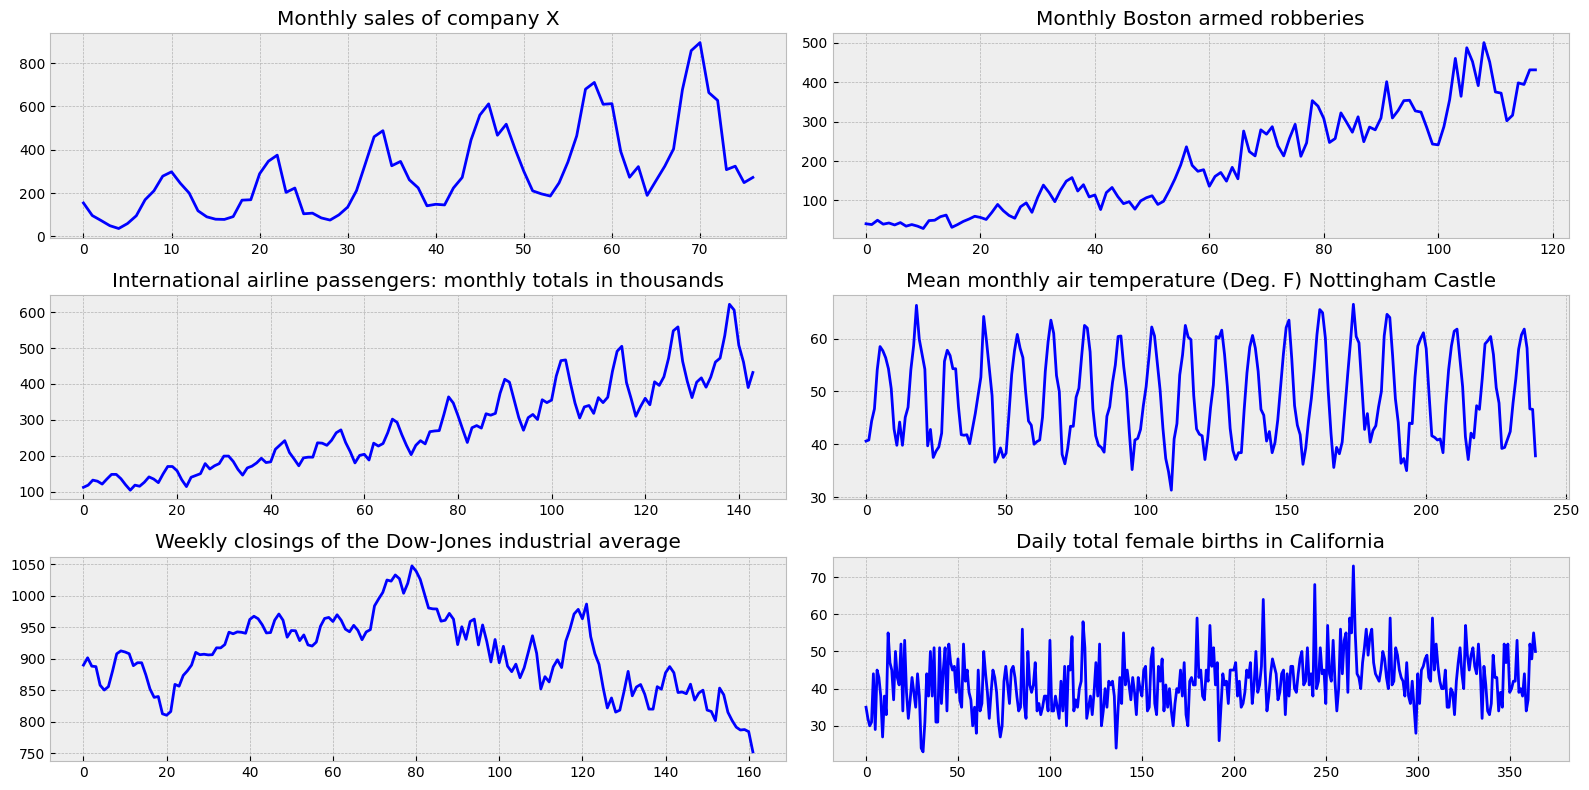

In [7]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

Поиск сезонности

In [8]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)

    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

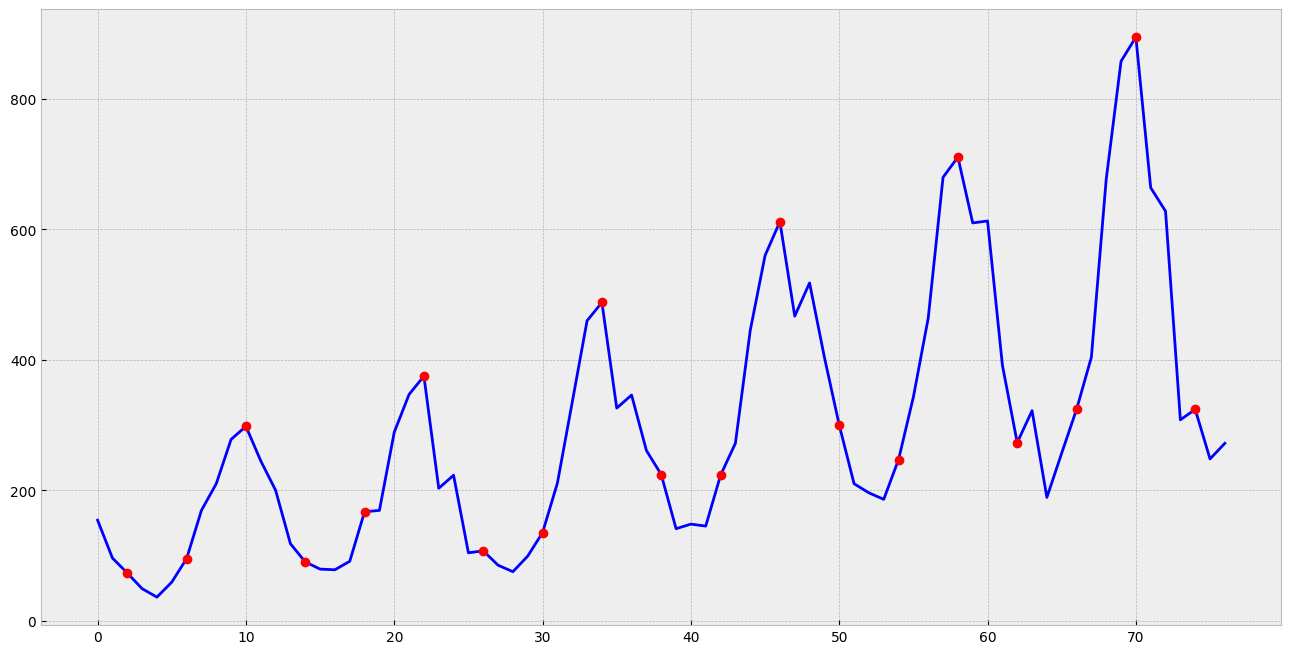

In [11]:
plot_ts_and_points(monthly_sales_of_company_x_jan_6['Count'], 2, 4)

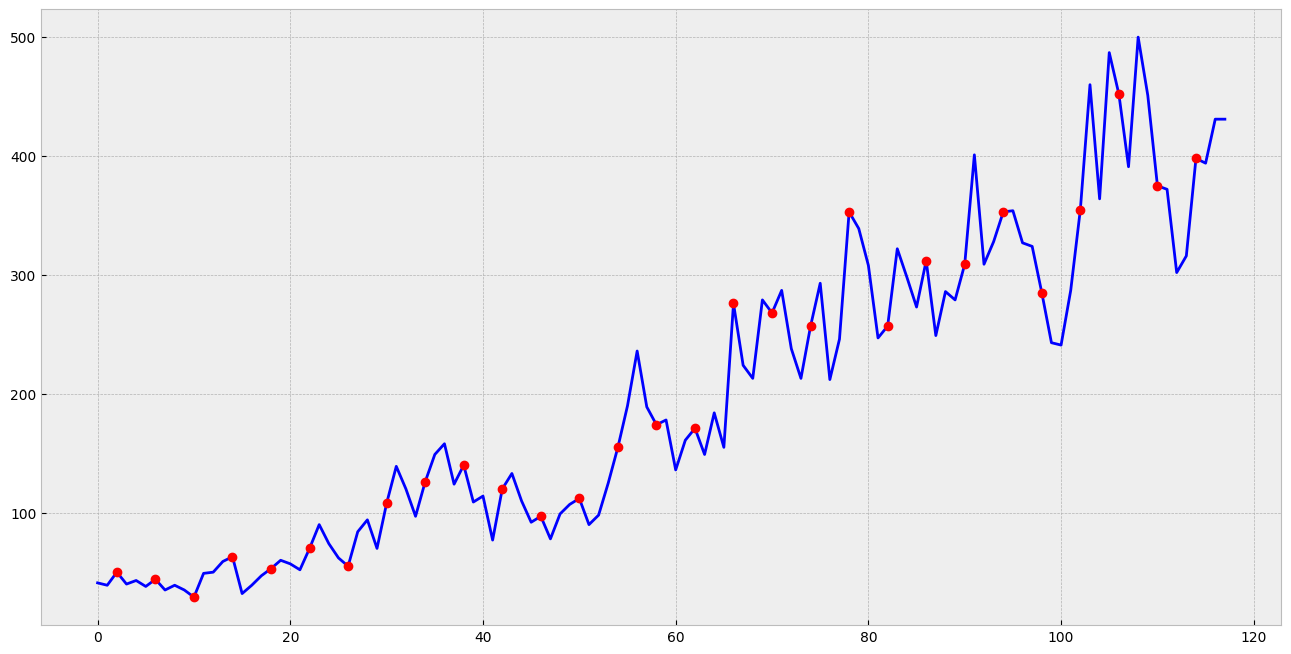

In [12]:
plot_ts_and_points(monthly_boston_armed_robberies_j['Count'], 2, 4)

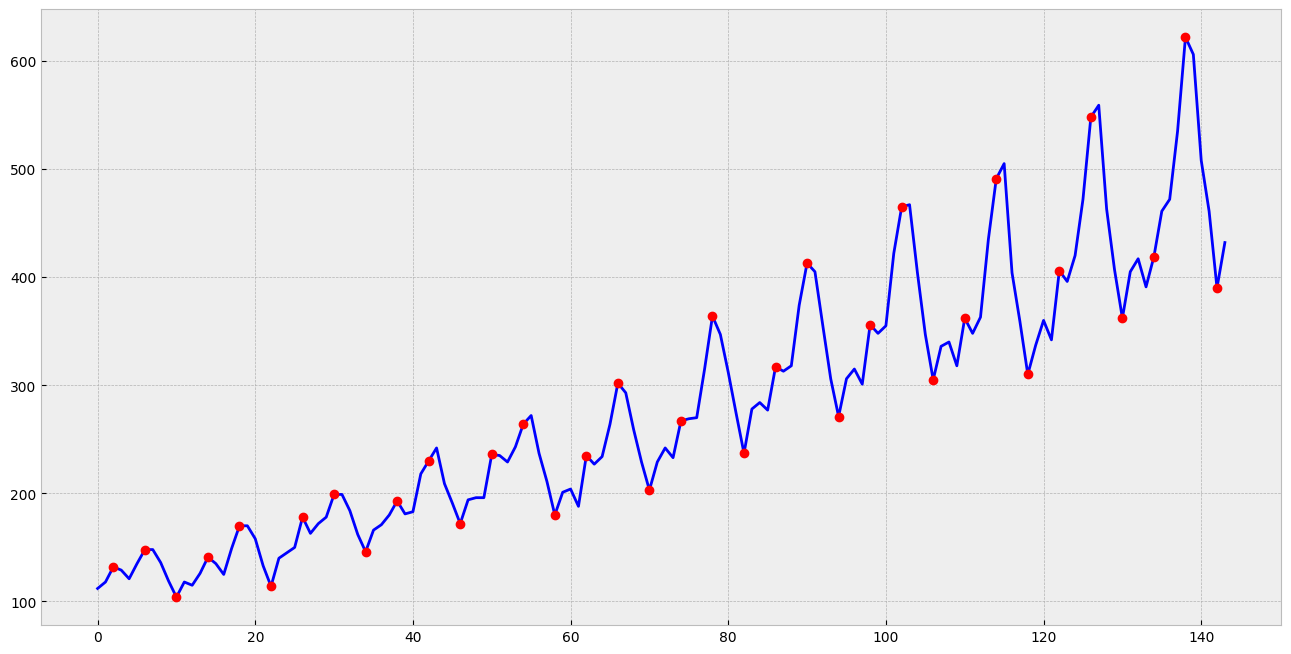

In [13]:
plot_ts_and_points(international_airline_passengers['Count'], 2, 4)

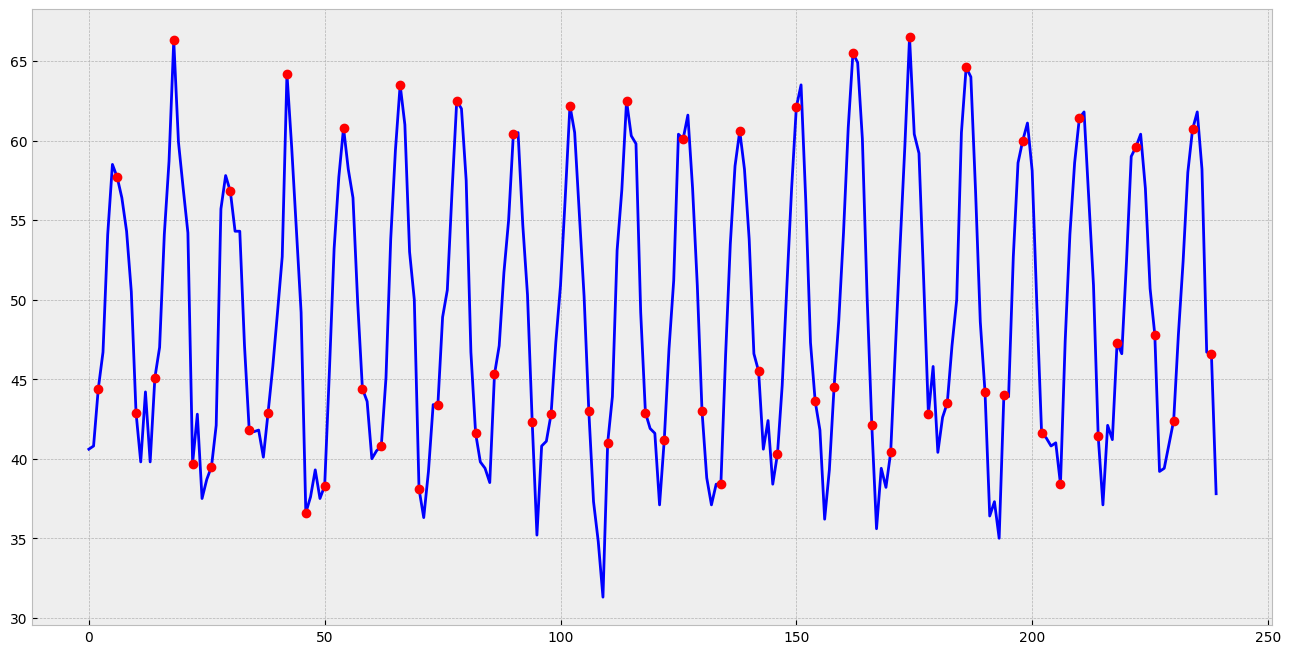

In [14]:
plot_ts_and_points(mean_mouthly_air_temperature_deg['Deg'], 2, 4)

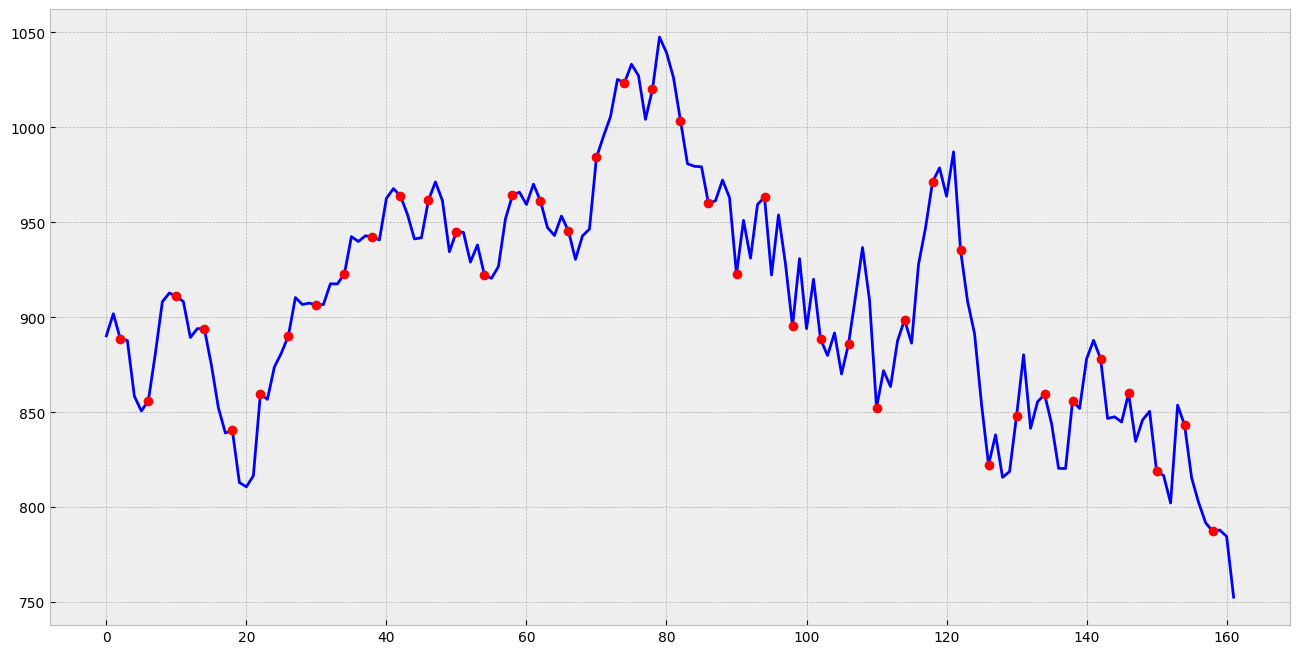

In [15]:
plot_ts_and_points(weekly_closings_of_the_dowjones['Close'], 2, 4)

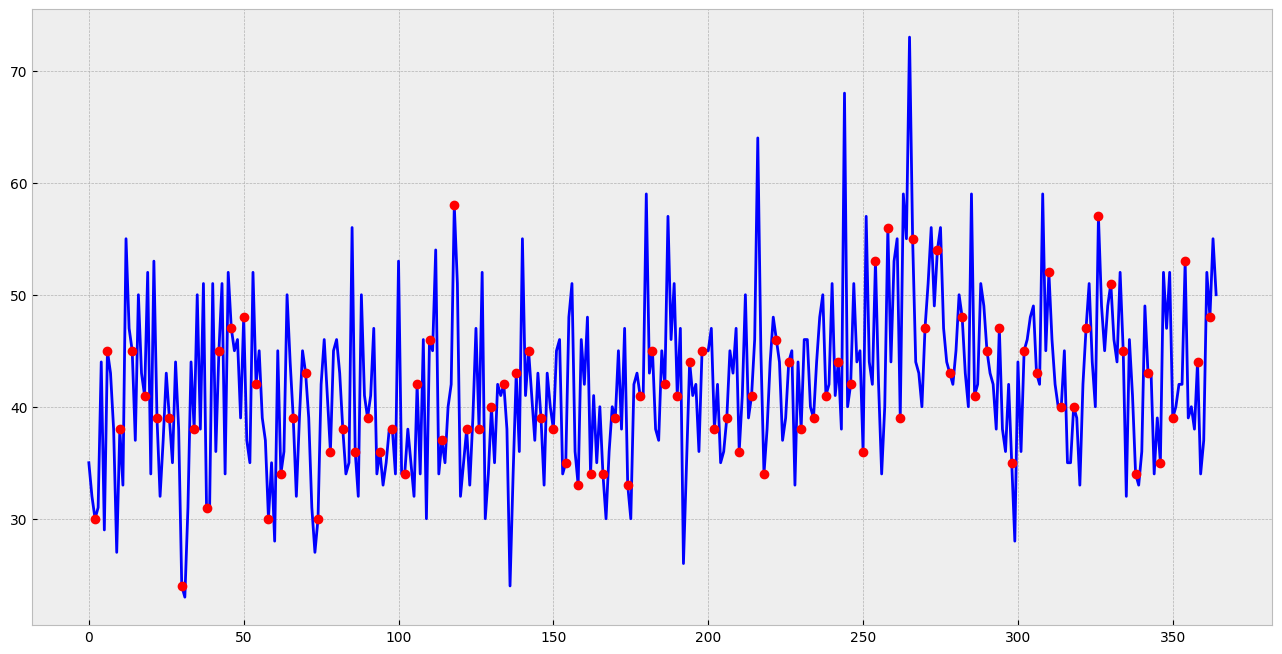

In [16]:
plot_ts_and_points(daily_total_female_births_in_cal['Count'], 2, 4)

Нормализация дисперсии

In [17]:
from scipy.stats import boxcox

In [18]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

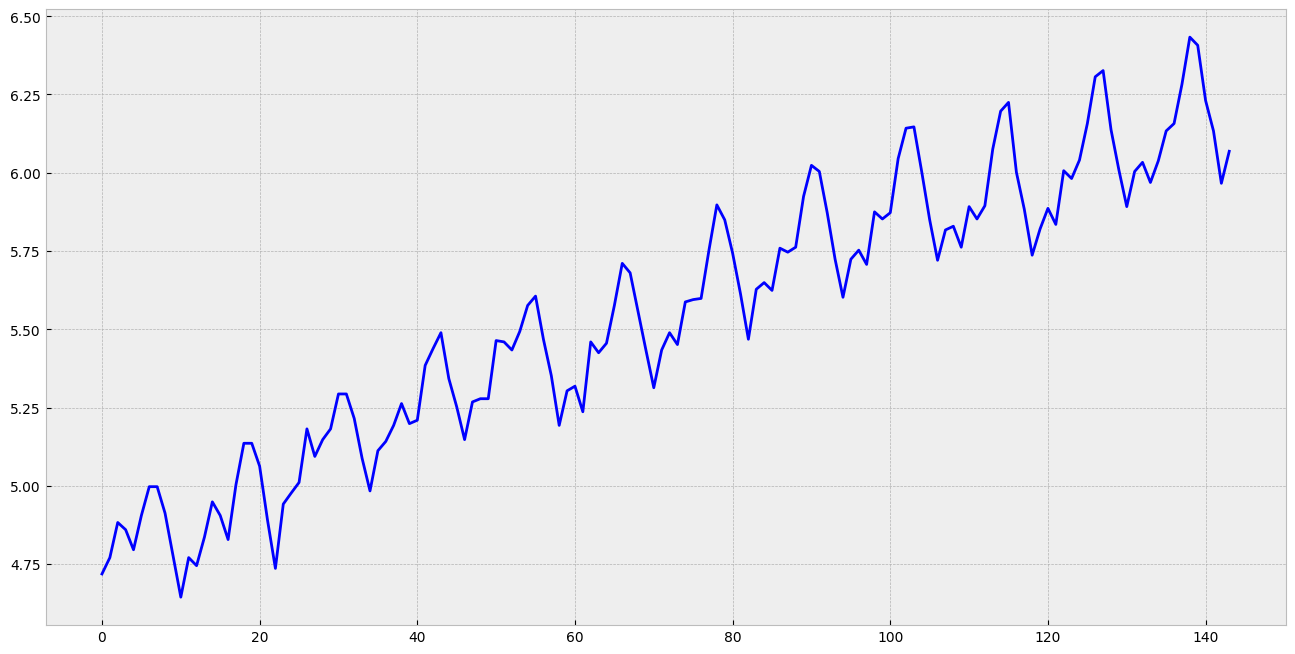

In [19]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Дифференциация

In [20]:
import numpy as np

In [21]:
series = np.diff(series, 1)

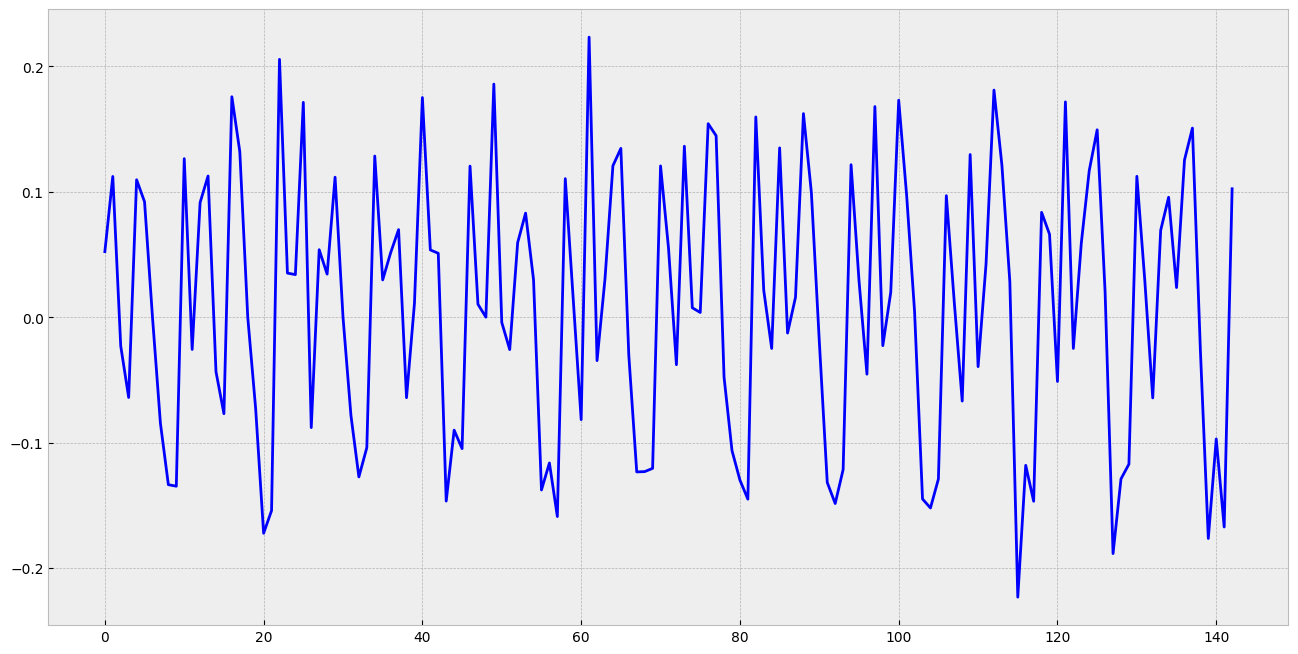

In [22]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Тест Дики-Фуллера

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [25]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Коррелограммы

In [27]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [28]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

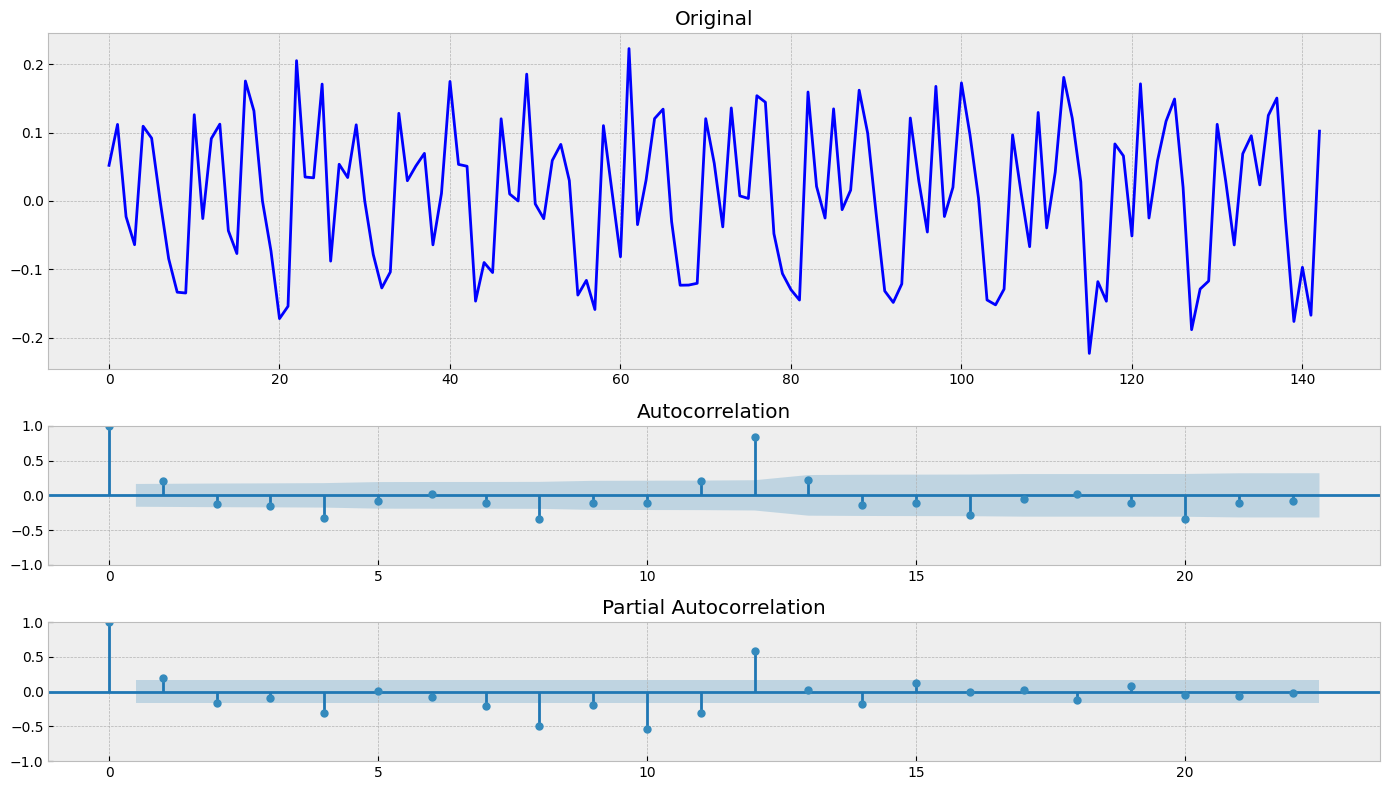

In [29]:
tsplot(series)

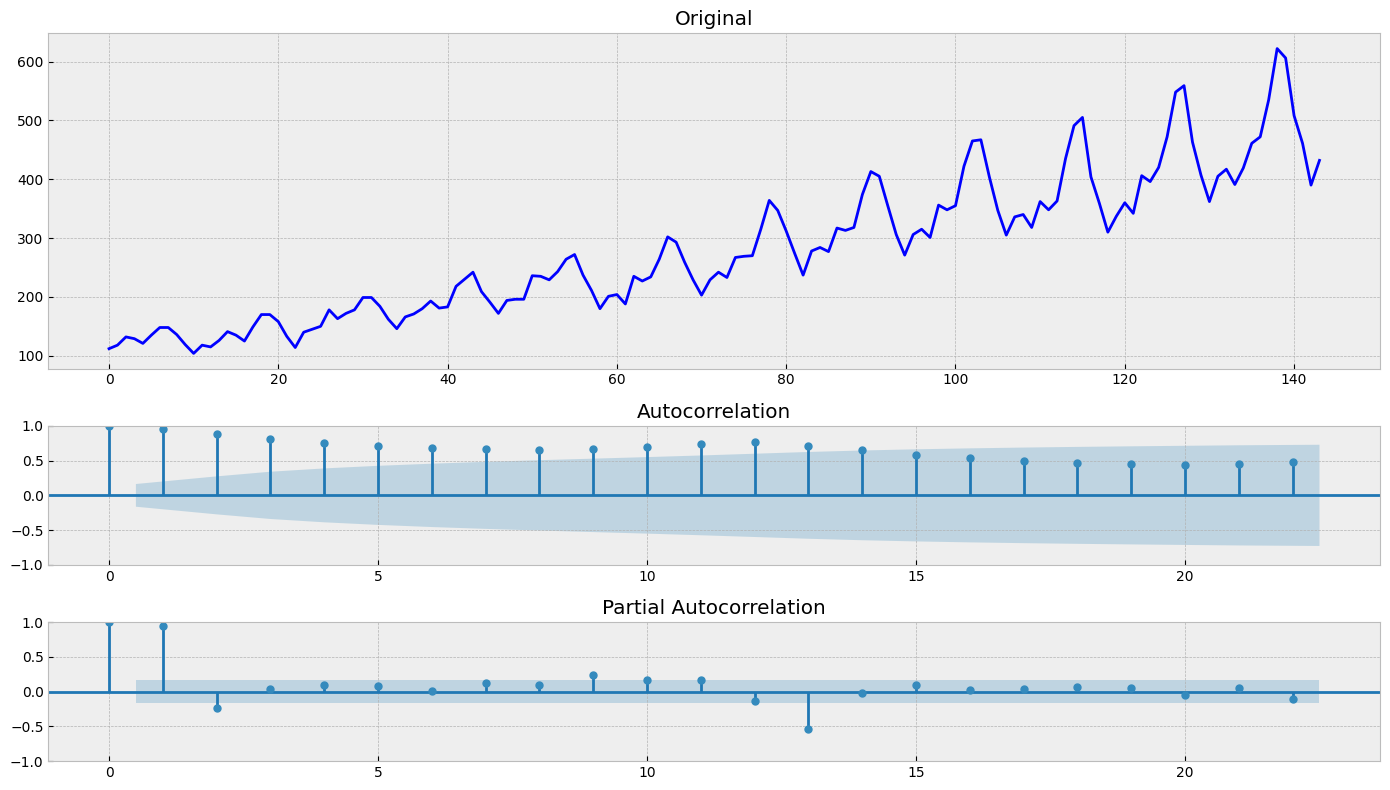

In [30]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])